In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import set_style
set_style("whitegrid")

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import datetime, timedelta

In [25]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf

In [4]:
edf = pd.read_csv('final_data_withna.csv',
                 parse_dates=['Time','Date'])
edf = edf.drop('Unnamed: 0', axis=1)
edf.head(25)

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,snowing,raining,hail,cloudy,Day ahead d-1,Real time d-1,Actual load d-1,Day ahead d-7,Real time d-7,Actual load d-7
0,2020-10-27 01:00:00+00:00,2020-10-27,1,0,0,4137.0,17.83,29.69,14.5,13.5,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-27 02:00:00+00:00,2020-10-27,2,0,0,3984.0,16.44,22.83,14.4,13.6,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-27 03:00:00+00:00,2020-10-27,3,0,0,3895.0,15.45,21.00,14.5,13.6,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-27 04:00:00+00:00,2020-10-27,4,0,0,3866.0,16.51,21.90,14.3,13.6,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-27 05:00:00+00:00,2020-10-27,5,0,0,3909.0,17.04,23.19,14.3,14.0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-27 06:00:00+00:00,2020-10-27,6,0,0,4121.0,24.41,23.67,14.5,14.1,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-10-27 07:00:00+00:00,2020-10-27,7,0,0,4547.0,30.03,15.17,14.5,14.0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-10-27 08:00:00+00:00,2020-10-27,8,0,0,4976.0,31.50,29.17,14.2,13.6,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-10-27 09:00:00+00:00,2020-10-27,9,0,0,5271.0,30.60,37.72,14.1,13.4,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-10-27 10:00:00+00:00,2020-10-27,10,0,0,5448.0,29.69,35.90,14.1,13.2,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25639 entries, 0 to 25638
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Time                   25639 non-null  datetime64[ns, UTC]
 1   Date                   25639 non-null  datetime64[ns]     
 2   Hour                   25639 non-null  int64              
 3   Minute                 25639 non-null  int64              
 4   Holiday                25639 non-null  int64              
 5   Actual Load            25639 non-null  float64            
 6   Day Ahead Price        25639 non-null  float64            
 7   Real Time Price        25639 non-null  float64            
 8   temp                   25639 non-null  float64            
 9   dwpt                   25639 non-null  float64            
 10  rhum                   25639 non-null  float64            
 11  prcp                   25639 non-null  float64        

**Plots:**

Text(0.5, 1.0, 'Real Time Hourly Price, NYC')

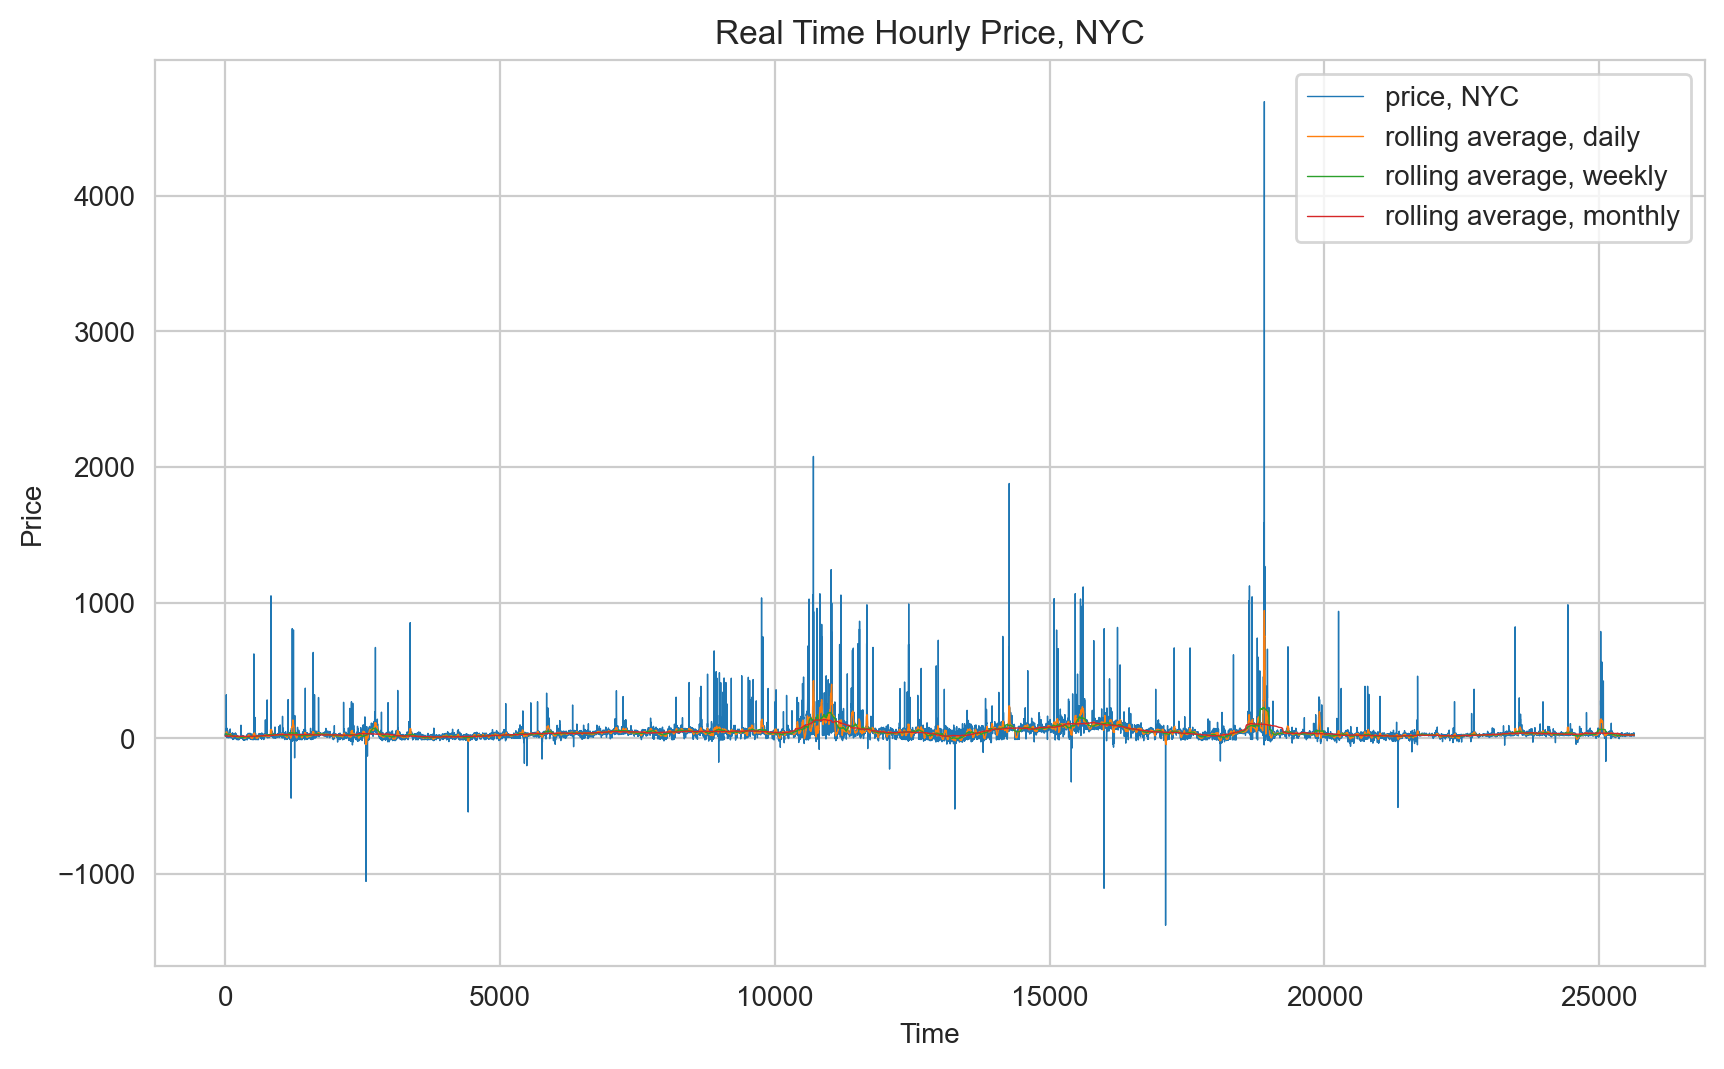

In [6]:
real_rolling_daily = edf['Real Time Price'].rolling(24, center=True, min_periods=24).mean()
real_rolling_weekly = edf['Real Time Price'].rolling(24*7, center=True, min_periods=24).mean()
real_rolling_monthly = edf['Real Time Price'].rolling(24*7*4, center=True, min_periods=24).mean()


plt.figure(figsize=(10,6), dpi=200)
plt.plot(edf['Real Time Price'], label='price, NYC', linewidth=0.5) 
plt.plot(real_rolling_daily, label='rolling average, daily',linewidth=0.5)
plt.plot(real_rolling_weekly, label='rolling average, weekly',linewidth=0.5)
plt.plot(real_rolling_monthly, label='rolling average, monthly',linewidth=0.5)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Real Time Hourly Price, NYC')

Text(0.5, 1.0, 'Day Ahead Hourly Price, NYC')

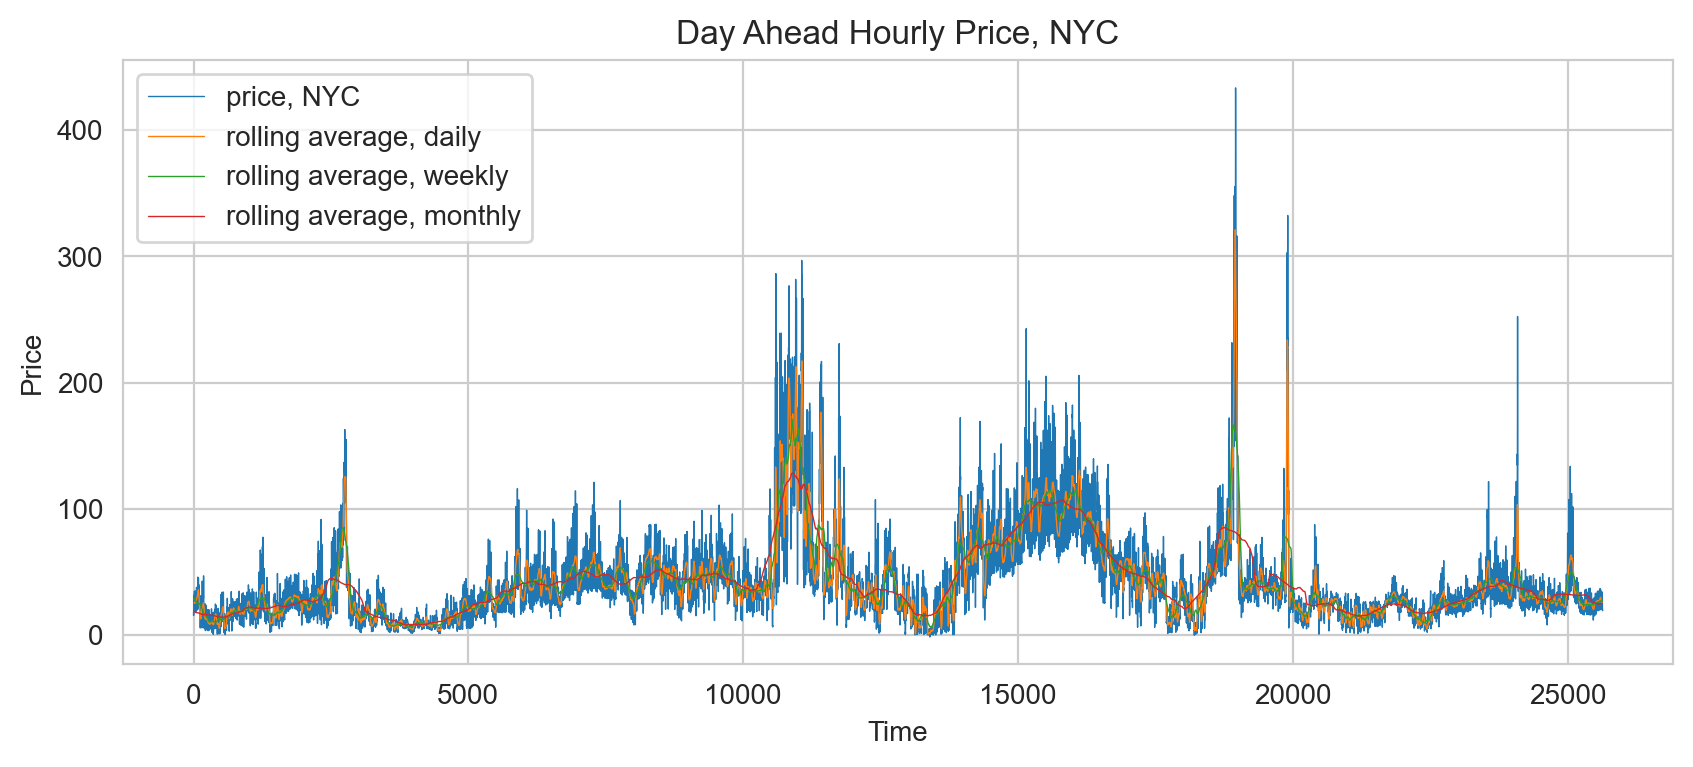

In [7]:
dayahead_rolling_daily = edf['Day Ahead Price'].rolling(24, center=True, min_periods=24).mean()
dayahead_rolling_weekly = edf['Day Ahead Price'].rolling(24*7, center=True, min_periods=24).mean()
dayahead_rolling_monthly = edf['Day Ahead Price'].rolling(24*7*4, center=True, min_periods=24).mean()


plt.figure(figsize=(10,4), dpi=200)
plt.plot(edf['Day Ahead Price'], label='price, NYC', linewidth=0.5)
plt.plot(dayahead_rolling_daily, label='rolling average, daily',linewidth=0.5)
plt.plot(dayahead_rolling_weekly, label='rolling average, weekly',linewidth=0.5)
plt.plot(dayahead_rolling_monthly, label='rolling average, monthly',linewidth=0.5)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Day Ahead Hourly Price, NYC')

Text(0.5, 1.0, 'Actual Load, NYC')

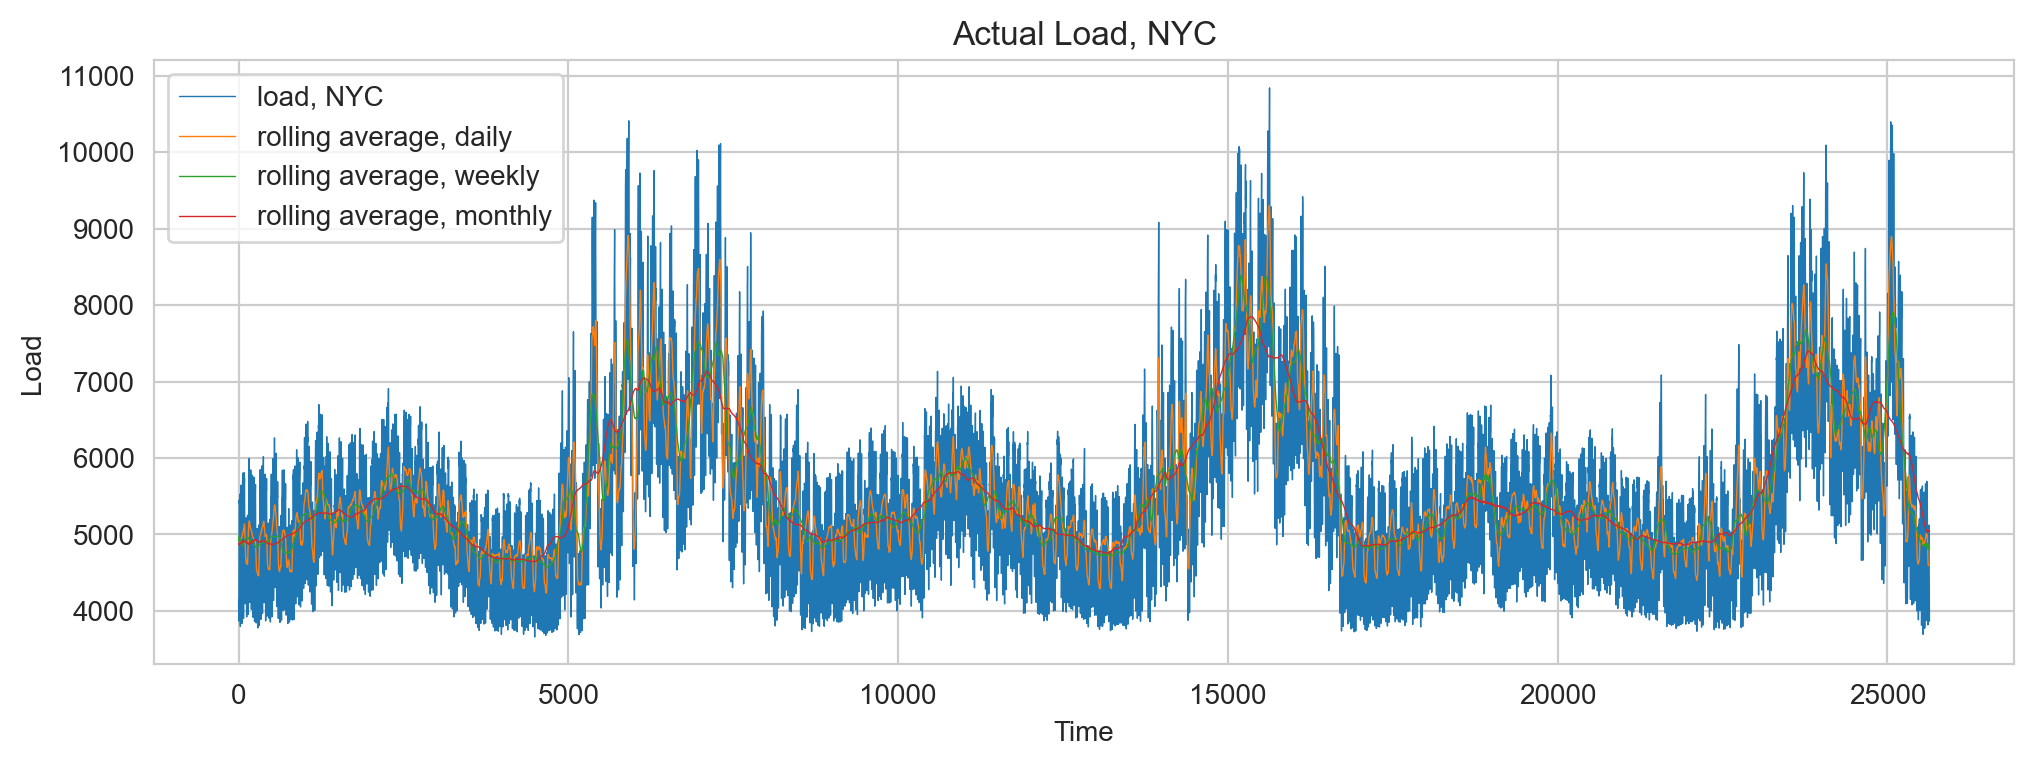

In [8]:
load_rolling_daily = edf['Actual Load'].rolling(24, center=True, min_periods=24).mean()
load_rolling_weekly = edf['Actual Load'].rolling(24*7, center=True, min_periods=24).mean()
load_rolling_monthly = edf['Actual Load'].rolling(24*7*4, center=True, min_periods=24).mean()


plt.figure(figsize=(12,4), dpi=200)
plt.plot(edf['Actual Load'], label='load, NYC', linewidth=0.5)
plt.plot(load_rolling_daily, label='rolling average, daily',linewidth=0.5)
plt.plot(load_rolling_weekly, label='rolling average, weekly',linewidth=0.5)
plt.plot(load_rolling_monthly, label='rolling average, monthly',linewidth=0.5)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Actual Load, NYC')

**Correlations**

In [9]:
correlations_pearson = edf.corrwith(edf['Real Time Price'], method='pearson', numeric_only=True, axis=0)
correlations_pearson.sort_values(ascending=False)

Real Time Price          1.000000
Day Ahead Price          0.445889
Day ahead d-1            0.363723
Day ahead d-7            0.274893
Actual Load              0.243484
Real time d-1            0.218511
Actual load d-1          0.199175
Actual load d-7          0.181055
Real time d-7            0.135824
Hour                     0.095655
monthly_Wind_anom        0.082871
weekly_Wind_anom         0.078523
wspd                     0.070869
snowing                  0.043563
month                    0.026861
week                     0.025431
wdir                     0.020198
coco                     0.018344
hail                     0.016612
monthly_Pressure_anom    0.010336
weekly_Pressure_anom     0.006444
weekly_Prec_anom         0.002113
raining                 -0.000135
pres                    -0.000712
cloudy                  -0.001077
monthly_Prec_anom       -0.001733
Holiday                 -0.002564
prcp                    -0.002599
temp                    -0.003961
weekly_T_anom 

In [10]:
correlations_pearson_no_realtime = edf.drop(['Real Time Price', 'Real time d-1', 'Real time d-7'], axis=1).corrwith(edf['Day Ahead Price'], method='pearson', 
                                                  numeric_only=True, axis=0)
correlations_pearson_no_realtime.sort_values(ascending=False)

Day Ahead Price          1.000000
Day ahead d-1            0.824555
Day ahead d-7            0.599860
Actual Load              0.498496
Actual load d-1          0.450776
Actual load d-7          0.416696
Hour                     0.151610
monthly_Wind_anom        0.081532
weekly_Wind_anom         0.077823
monthly_Pressure_anom    0.076455
weekly_Pressure_anom     0.072843
pres                     0.049184
snowing                  0.045716
temp                     0.040597
month                    0.040373
Holiday                  0.038497
wspd                     0.037620
week                     0.035362
hail                     0.034995
wdir                     0.024305
dwpt                     0.021963
cloudy                  -0.012816
prcp                    -0.014727
weekly_Prec_anom        -0.015661
weekly_T_anom           -0.017353
monthly_Prec_anom       -0.018204
coco                    -0.018344
monthly_T_anom          -0.018407
raining                 -0.034349
rhum          

In [11]:
correlations_pearson_no_dayahead = edf.drop(['Day Ahead Price', 'Day ahead d-1', 'Day ahead d-7'], axis=1).corrwith(edf['Real Time Price'], method='pearson', 
                                                  numeric_only=True, axis=0)
correlations_pearson_no_dayahead.sort_values(ascending=False)

Real Time Price          1.000000
Actual Load              0.243484
Real time d-1            0.218511
Actual load d-1          0.199175
Actual load d-7          0.181055
Real time d-7            0.135824
Hour                     0.095655
monthly_Wind_anom        0.082871
weekly_Wind_anom         0.078523
wspd                     0.070869
snowing                  0.043563
month                    0.026861
week                     0.025431
wdir                     0.020198
coco                     0.018344
hail                     0.016612
monthly_Pressure_anom    0.010336
weekly_Pressure_anom     0.006444
weekly_Prec_anom         0.002113
raining                 -0.000135
pres                    -0.000712
cloudy                  -0.001077
monthly_Prec_anom       -0.001733
Holiday                 -0.002564
prcp                    -0.002599
temp                    -0.003961
weekly_T_anom           -0.010948
monthly_T_anom          -0.013581
dwpt                    -0.017372
rhum          

In [12]:
correlations_kendall = edf.corrwith(edf['Real Time Price'], method='kendall', numeric_only=True, axis=0)
correlations_kendall.sort_values(ascending=False)

Real Time Price          1.000000
Day Ahead Price          0.579763
Day ahead d-1            0.490518
Real time d-1            0.457620
Day ahead d-7            0.397238
Real time d-7            0.339099
Actual Load              0.314215
Actual load d-1          0.278873
Actual load d-7          0.272805
dwpt                     0.141928
temp                     0.136102
Hour                     0.112786
month                    0.094918
week                     0.086334
monthly_T_anom           0.051330
monthly_Prec_anom        0.044604
weekly_Wind_anom         0.040064
cloudy                   0.036337
monthly_Wind_anom        0.035160
weekly_T_anom            0.033193
monthly_Pressure_anom    0.022134
coco                     0.019454
rhum                     0.019114
snowing                  0.019100
hail                     0.012342
prcp                     0.010287
weekly_Pressure_anom     0.009368
weekly_Prec_anom         0.008010
wspd                    -0.000684
Holiday       

In [13]:
correlations_kendall_no_realtime = edf.drop(['Real Time Price', 'Real time d-1', 'Real time d-7'], axis=1).corrwith(edf['Day Ahead Price'], method='kendall', 
                                                  numeric_only=True, axis=0)
correlations_kendall_no_realtime.sort_values(ascending=False)

Day Ahead Price          1.000000
Day ahead d-1            0.706358
Day ahead d-7            0.541286
Actual Load              0.397767
Actual load d-1          0.363666
Actual load d-7          0.349944
Hour                     0.133018
dwpt                     0.129361
temp                     0.119003
month                    0.097516
week                     0.087355
weekly_Wind_anom         0.043161
monthly_Wind_anom        0.039838
monthly_Pressure_anom    0.038453
weekly_Pressure_anom     0.033010
monthly_Prec_anom        0.032168
hail                     0.026686
monthly_T_anom           0.025087
cloudy                   0.023963
snowing                  0.023611
Holiday                  0.017451
rhum                     0.013996
weekly_T_anom            0.012388
pres                     0.005374
wdir                     0.000546
wspd                    -0.001713
coco                    -0.004492
prcp                    -0.006711
weekly_Prec_anom        -0.014529
raining       

In [14]:
correlations_kendall_no_dayahead = edf.drop(['Day Ahead Price', 'Day ahead d-1', 'Day ahead d-7'], axis=1).corrwith(edf['Real Time Price'], method='kendall', 
                                                  numeric_only=True, axis=0)
correlations_kendall_no_dayahead.sort_values(ascending=False)

Real Time Price          1.000000
Real time d-1            0.457620
Real time d-7            0.339099
Actual Load              0.314215
Actual load d-1          0.278873
Actual load d-7          0.272805
dwpt                     0.141928
temp                     0.136102
Hour                     0.112786
month                    0.094918
week                     0.086334
monthly_T_anom           0.051330
monthly_Prec_anom        0.044604
weekly_Wind_anom         0.040064
cloudy                   0.036337
monthly_Wind_anom        0.035160
weekly_T_anom            0.033193
monthly_Pressure_anom    0.022134
coco                     0.019454
rhum                     0.019114
snowing                  0.019100
hail                     0.012342
prcp                     0.010287
weekly_Pressure_anom     0.009368
weekly_Prec_anom         0.008010
wspd                    -0.000684
Holiday                 -0.000803
raining                 -0.006921
pres                    -0.008247
wdir          

In [15]:
correlations_spearman = edf.corrwith(edf['Real Time Price'], method='spearman', numeric_only=True, axis=0)
correlations_spearman.sort_values(ascending=False)

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Real Time Price          1.000000
Day Ahead Price          0.751022
Day ahead d-1            0.654324
Real time d-1            0.599142
Day ahead d-7            0.549104
Real time d-7            0.464962
Actual Load              0.458255
Actual load d-1          0.410169
Actual load d-7          0.401422
dwpt                     0.206095
temp                     0.192667
Hour                     0.164471
month                    0.135623
week                     0.127142
monthly_T_anom           0.074660
monthly_Prec_anom        0.067271
weekly_Wind_anom         0.059309
monthly_Wind_anom        0.051832
weekly_T_anom            0.048201
cloudy                   0.044501
monthly_Pressure_anom    0.032361
rhum                     0.030568
coco                     0.028475
snowing                  0.023391
hail                     0.015114
weekly_Pressure_anom     0.013397
prcp                     0.013143
weekly_Prec_anom         0.012378
Holiday                 -0.000984
wspd          

In [16]:
correlations_spearman_no_realtime = edf.drop(['Real Time Price', 'Real time d-1', 'Real time d-7'], axis=1).corrwith(edf['Day Ahead Price'], method='spearman', 
                                                  numeric_only=True, axis=0)
correlations_spearman_no_realtime.sort_values(ascending=False)

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Day Ahead Price          1.000000
Day ahead d-1            0.871132
Day ahead d-7            0.722122
Actual Load              0.568370
Actual load d-1          0.523911
Actual load d-7          0.506100
Hour                     0.195095
dwpt                     0.190274
temp                     0.171049
month                    0.144342
week                     0.133184
weekly_Wind_anom         0.064369
monthly_Wind_anom        0.059234
monthly_Pressure_anom    0.057386
weekly_Pressure_anom     0.049452
monthly_Prec_anom        0.047599
monthly_T_anom           0.035786
hail                     0.032680
cloudy                   0.029346
snowing                  0.028915
rhum                     0.022599
Holiday                  0.021371
weekly_T_anom            0.017361
pres                     0.007929
wdir                     0.000490
wspd                    -0.003294
coco                    -0.006117
prcp                    -0.008461
weekly_Prec_anom        -0.019408
raining       

In [17]:
correlations_spearman_no_dayahead = edf.drop(['Day Ahead Price', 'Day ahead d-1', 'Day ahead d-7'], axis=1).corrwith(edf['Real Time Price'], method='spearman', 
                                                  numeric_only=True, axis=0)
correlations_spearman_no_dayahead.sort_values(ascending=False)

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Real Time Price          1.000000
Real time d-1            0.599142
Real time d-7            0.464962
Actual Load              0.458255
Actual load d-1          0.410169
Actual load d-7          0.401422
dwpt                     0.206095
temp                     0.192667
Hour                     0.164471
month                    0.135623
week                     0.127142
monthly_T_anom           0.074660
monthly_Prec_anom        0.067271
weekly_Wind_anom         0.059309
monthly_Wind_anom        0.051832
weekly_T_anom            0.048201
cloudy                   0.044501
monthly_Pressure_anom    0.032361
rhum                     0.030568
coco                     0.028475
snowing                  0.023391
hail                     0.015114
weekly_Pressure_anom     0.013397
prcp                     0.013143
weekly_Prec_anom         0.012378
Holiday                 -0.000984
wspd                    -0.002275
raining                 -0.008476
pres                    -0.013631
wdir          

**Reserve the last 6 months of the data for testing**

In [18]:
df = edf[(edf.Date >= datetime(2020,10,27)) & (edf.Date < datetime(2023,4,1))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21243 entries, 0 to 21242
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Time                   21243 non-null  datetime64[ns, UTC]
 1   Date                   21243 non-null  datetime64[ns]     
 2   Hour                   21243 non-null  int64              
 3   Minute                 21243 non-null  int64              
 4   Holiday                21243 non-null  int64              
 5   Actual Load            21243 non-null  float64            
 6   Day Ahead Price        21243 non-null  float64            
 7   Real Time Price        21243 non-null  float64            
 8   temp                   21243 non-null  float64            
 9   dwpt                   21243 non-null  float64            
 10  rhum                   21243 non-null  float64            
 11  prcp                   21243 non-null  float64        

In [19]:
df.head()

,Time,Date,Hour,Minute,Holiday,Actual Load,Day Ahead Price,Real Time Price,temp,dwpt,...,snowing,raining,hail,cloudy,Day ahead d-1,Real time d-1,Actual load d-1,Day ahead d-7,Real time d-7,Actual load d-7
0,2020-10-27 01:00:00+00:00,2020-10-27,1,0,0,4137.0,17.83,29.69,14.5,13.5,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-27 02:00:00+00:00,2020-10-27,2,0,0,3984.0,16.44,22.83,14.4,13.6,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-27 03:00:00+00:00,2020-10-27,3,0,0,3895.0,15.45,21.00,14.5,13.6,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-27 04:00:00+00:00,2020-10-27,4,0,0,3866.0,16.51,21.90,14.3,13.6,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-27 05:00:00+00:00,2020-10-27,5,0,0,3909.0,17.04,23.19,14.3,14.0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN


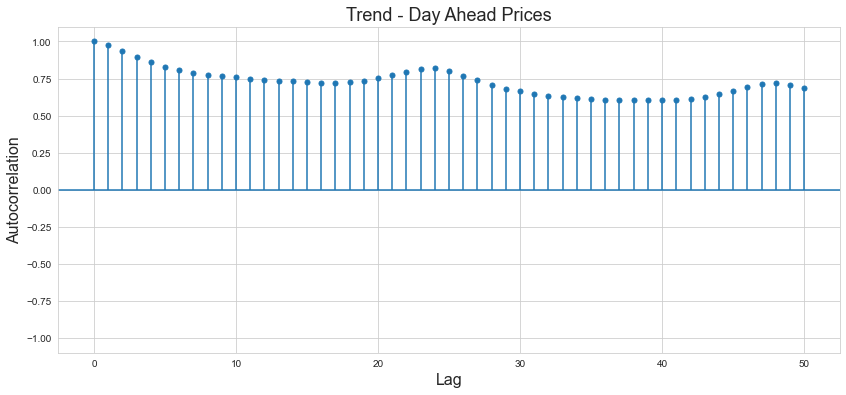

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

sm.graphics.tsa.plot_acf(df['Day Ahead Price'].values,
                            alpha=None,
                            lags = 50,
                            ax = ax)

plt.title('Trend - Day Ahead Prices', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

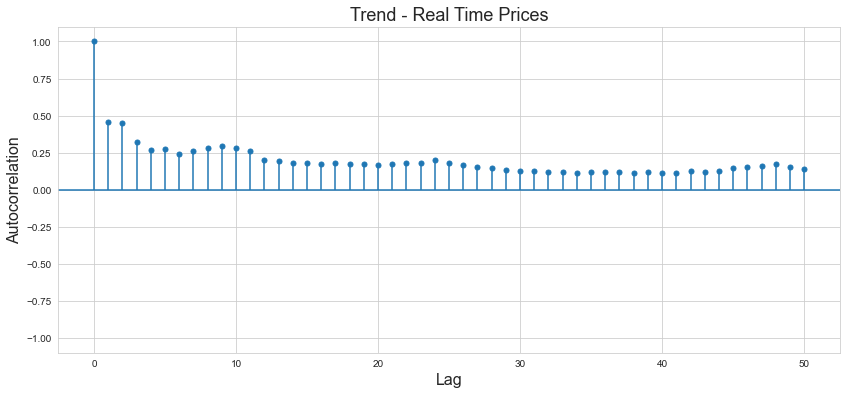

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

sm.graphics.tsa.plot_acf(df['Real Time Price'].values,
                            alpha=None,
                            lags = 50,
                            ax = ax)

plt.title('Trend - Real Time Prices', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

In [42]:
print(f"adfuller: {adfuller(df['Real Time Price'],regression='c')}, \n kpss: {kpss(df['Real Time Price'],regression='c')}")

adfuller: (-12.111385986790294, 1.9157776382838997e-22, 46, 21196, {'1%': -3.4306585531288296, '5%': -2.861676370062455, '10%': -2.566842585984384}, 240172.0801390247), 
 kpss: (3.527182148208332, 0.01, 78, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_15058/126736298.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print(f"adfuller: {adfuller(df['Real Time Price'],regression='c')}, \n kpss: {kpss(df['Real Time Price'],regression='c')}")


In [43]:
print(f"adfuller: {adfuller(df['Day Ahead Price'], regression='c')}, \n kpss: {kpss(df['Day Ahead Price'],regression='c')}")

adfuller: (-5.734699686693601, 6.478739829931394e-07, 46, 21196, {'1%': -3.4306585531288296, '5%': -2.861676370062455, '10%': -2.566842585984384}, 143648.369491986), 
 kpss: (3.962232634678979, 0.01, 86, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_15058/206761889.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print(f"adfuller: {adfuller(df['Day Ahead Price'], regression='c')}, \n kpss: {kpss(df['Day Ahead Price'],regression='c')}")


In [45]:
#Real time: adfuller: p-value < 0.05 so stationary; kpss: p-value < 0.05 so non-stationary
#Day ahead: adfuller: p-value < 0.05 so stationary; kpss: p-value < 0.05 so non-stationary

**Differencing**

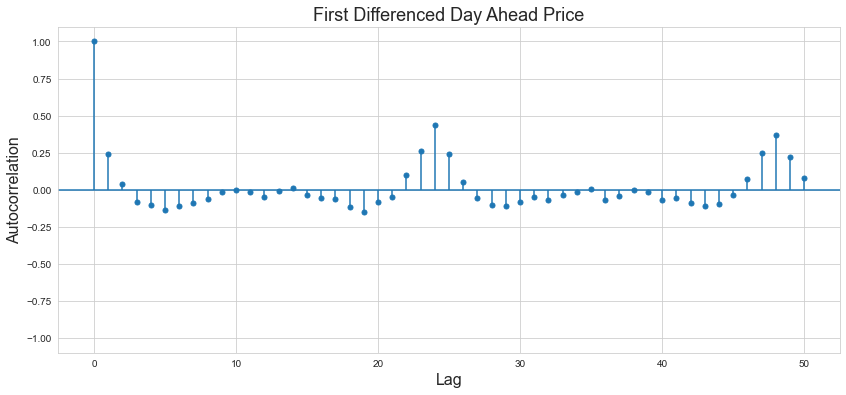

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

## use pandas .diff()
sm.graphics.tsa.plot_acf(df['Day Ahead Price'].diff()[1:],
                            alpha=None,
                            ax=ax,
                            lags=50)

plt.title('First Differenced Day Ahead Price', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

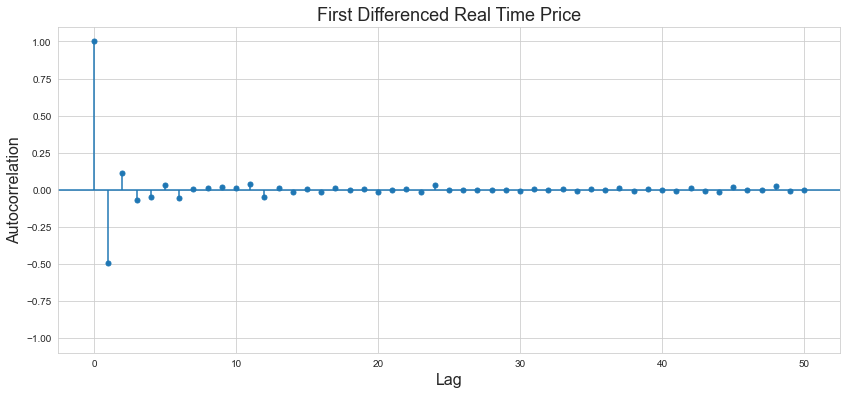

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))

## use pandas .diff()
sm.graphics.tsa.plot_acf(df['Real Time Price'].diff()[1:],
                            alpha=None,
                            ax=ax,
                            lags=50)

plt.title('First Differenced Real Time Price', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)

plt.ylim(-1.1,1.1)

plt.show()

In [49]:
print(f"adfuller: {adfuller(df['Real Time Price'].diff()[1:],regression='c')},\n kpss: {kpss(df['Real Time Price'].diff()[1:],regression='c')}")

adfuller: (-35.58599784040923, 0.0, 46, 21195, {'1%': -3.4306585676884196, '5%': -2.8616763764969675, '10%': -2.566842589409354}, 240267.27438345784),
 kpss: (0.014251629561918354, 0.1, 483, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_15058/73618111.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"adfuller: {adfuller(df['Real Time Price'].diff()[1:],regression='c')},\n kpss: {kpss(df['Real Time Price'].diff()[1:],regression='c')}")


In [50]:
print(f"adfuller: {adfuller(df['Day Ahead Price'].diff()[1:],regression='c')},\n kpss: {kpss(df['Day Ahead Price'].diff()[1:],regression='c')}")

adfuller: (-32.46952466242984, 0.0, 46, 21195, {'1%': -3.4306585676884196, '5%': -2.8616763764969675, '10%': -2.566842589409354}, 143646.69925392943),
 kpss: (0.017774989821325207, 0.1, 216, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_15058/632620758.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(f"adfuller: {adfuller(df['Day Ahead Price'].diff()[1:],regression='c')},\n kpss: {kpss(df['Day Ahead Price'].diff()[1:],regression='c')}")


# Baseline Model (Day Ahead Prices)

In [69]:
from sklearn.metrics import mean_squared_error

In [64]:
X_train = df[['Time', 'Hour', 'Day Ahead Price', 'Day ahead d-1', 'Day ahead d-7', 'Actual Load', 'Actual load d-1',
             'Actual load d-7']][167:]
X_train.head()

,Time,Hour,Day Ahead Price,Day ahead d-1,Day ahead d-7,Actual Load,Actual load d-1,Actual load d-7
167,2020-11-03 01:00:00+00:00,1,5.78,10.62,17.83,4339.0,4166.0,4137.0
168,2020-11-03 02:00:00+00:00,2,5.76,8.46,16.44,4204.0,4040.0,3984.0
169,2020-11-03 03:00:00+00:00,3,5.76,8.75,15.45,4118.0,3954.0,3895.0
170,2020-11-03 04:00:00+00:00,4,5.77,5.78,16.51,4109.0,3982.0,3866.0
171,2020-11-03 05:00:00+00:00,5,8.82,8.77,17.04,4179.0,4051.0,3909.0


In [61]:
tdf = edf[(edf.Date >= datetime(2023,4,1))]

In [65]:
X_test = tdf[['Time', 'Hour','Day Ahead Price','Day ahead d-1', 'Day ahead d-7', 'Actual Load', 'Actual load d-1',
             'Actual load d-7']]
X_test.head()

,Time,Hour,Day Ahead Price,Day ahead d-1,Day ahead d-7,Actual Load,Actual load d-1,Actual load d-7
21243,2023-04-01 00:00:00+00:00,0,6.95,23.81,21.32,4580.0,4676.0,4576.0
21244,2023-04-01 01:00:00+00:00,1,6.87,21.65,19.79,4338.0,4427.0,4320.0
21245,2023-04-01 02:00:00+00:00,2,6.95,20.49,18.74,4168.0,4289.0,4175.0
21246,2023-04-01 03:00:00+00:00,3,6.90,20.53,17.52,4043.0,4195.0,4051.0
21247,2023-04-01 04:00:00+00:00,4,6.89,20.52,13.07,3994.0,4162.5,4012.0


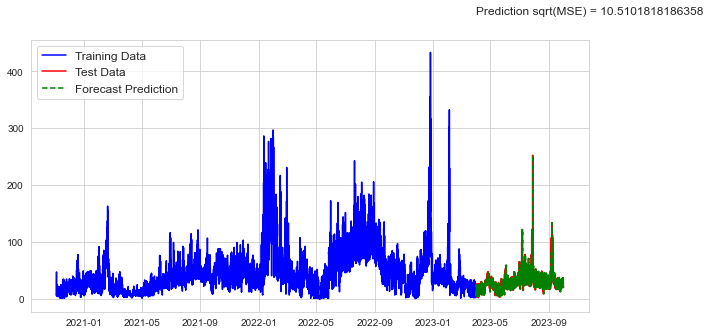

In [81]:
#Baseline model is the 1-day ago price at the same hour. Since our ultimate goal is to predict next-day prices,
#We will have 1-day ago price info. In this case, our test data is the last 6 months, but I assume that we will
#predict one-day at a time, so we will have 1-day ago price info for each test point. 

plt.figure(figsize=(10,5))

plt.plot(X_train['Time'],
            X_train['Day Ahead Price'],
            'b-',
            label="Training Data")

plt.plot(X_test['Time'],
            X_test['Day Ahead Price'],
            'r-',
            label="Test Data")

plt.plot(X_test['Time'],
            X_test['Day ahead d-1'],
            'g--',
            label="Forecast Prediction")

plt.text(X_train['Time'].values[-10], 500,
         "Prediction sqrt(MSE) = " + str(np.sqrt(mean_squared_error(X_test['Day Ahead Price'],
                                                                  X_test['Day ahead d-1']))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

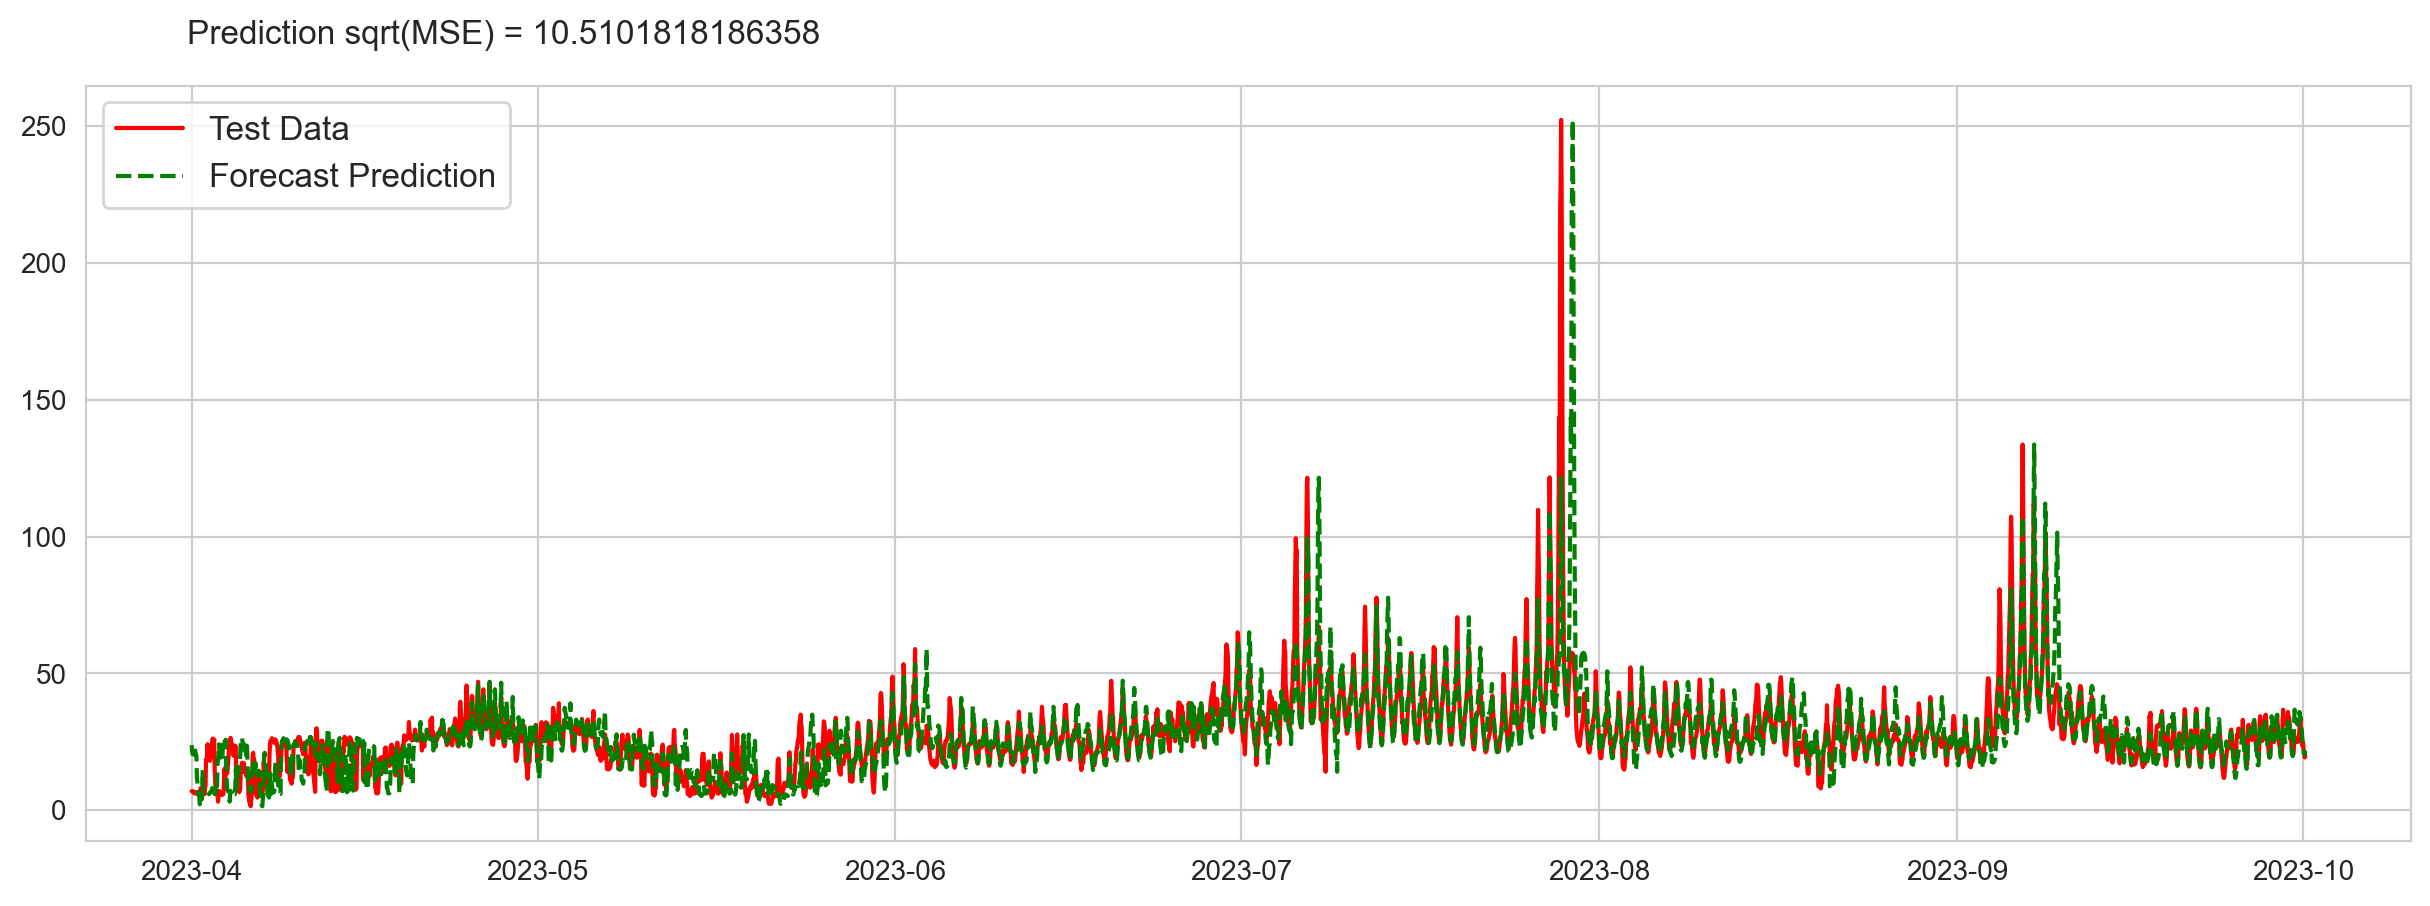

In [91]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(X_test['Time'],
            X_test['Day Ahead Price'],
            'r-',
            label="Test Data")

plt.plot(X_test['Time'],
            X_test['Day ahead d-1'],
            'g--',
            label="Forecast Prediction")

plt.text(X_train['Time'].values[-10], 280,
         "Prediction sqrt(MSE) = " + str(np.sqrt(mean_squared_error(X_test['Day Ahead Price'],
                                                                  X_test['Day ahead d-1']))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

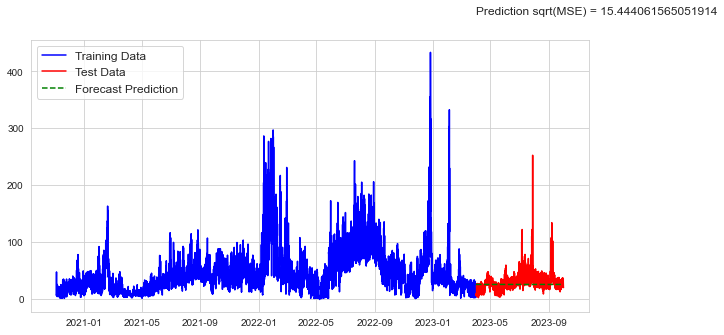

In [99]:
#If we don't allow using d-1 prices for the test data, the following uses the price of the last training point 
#for each test data. 

preds = X_train.iloc[-1]['Day ahead d-1']*np.ones(len(X_test))

plt.figure(figsize=(10,5))

plt.plot(X_train['Time'],
            X_train['Day Ahead Price'],
            'b-',
            label="Training Data")

plt.plot(X_test['Time'],
            X_test['Day Ahead Price'],
            'r-',
            label="Test Data")

plt.plot(X_test['Time'],
            preds,
            'g--',
            label="Forecast Prediction")

plt.text(X_train['Time'].values[-10], 500,
         "Prediction sqrt(MSE) = " + str(np.sqrt(mean_squared_error(X_test['Day Ahead Price'],
                                                                  preds))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

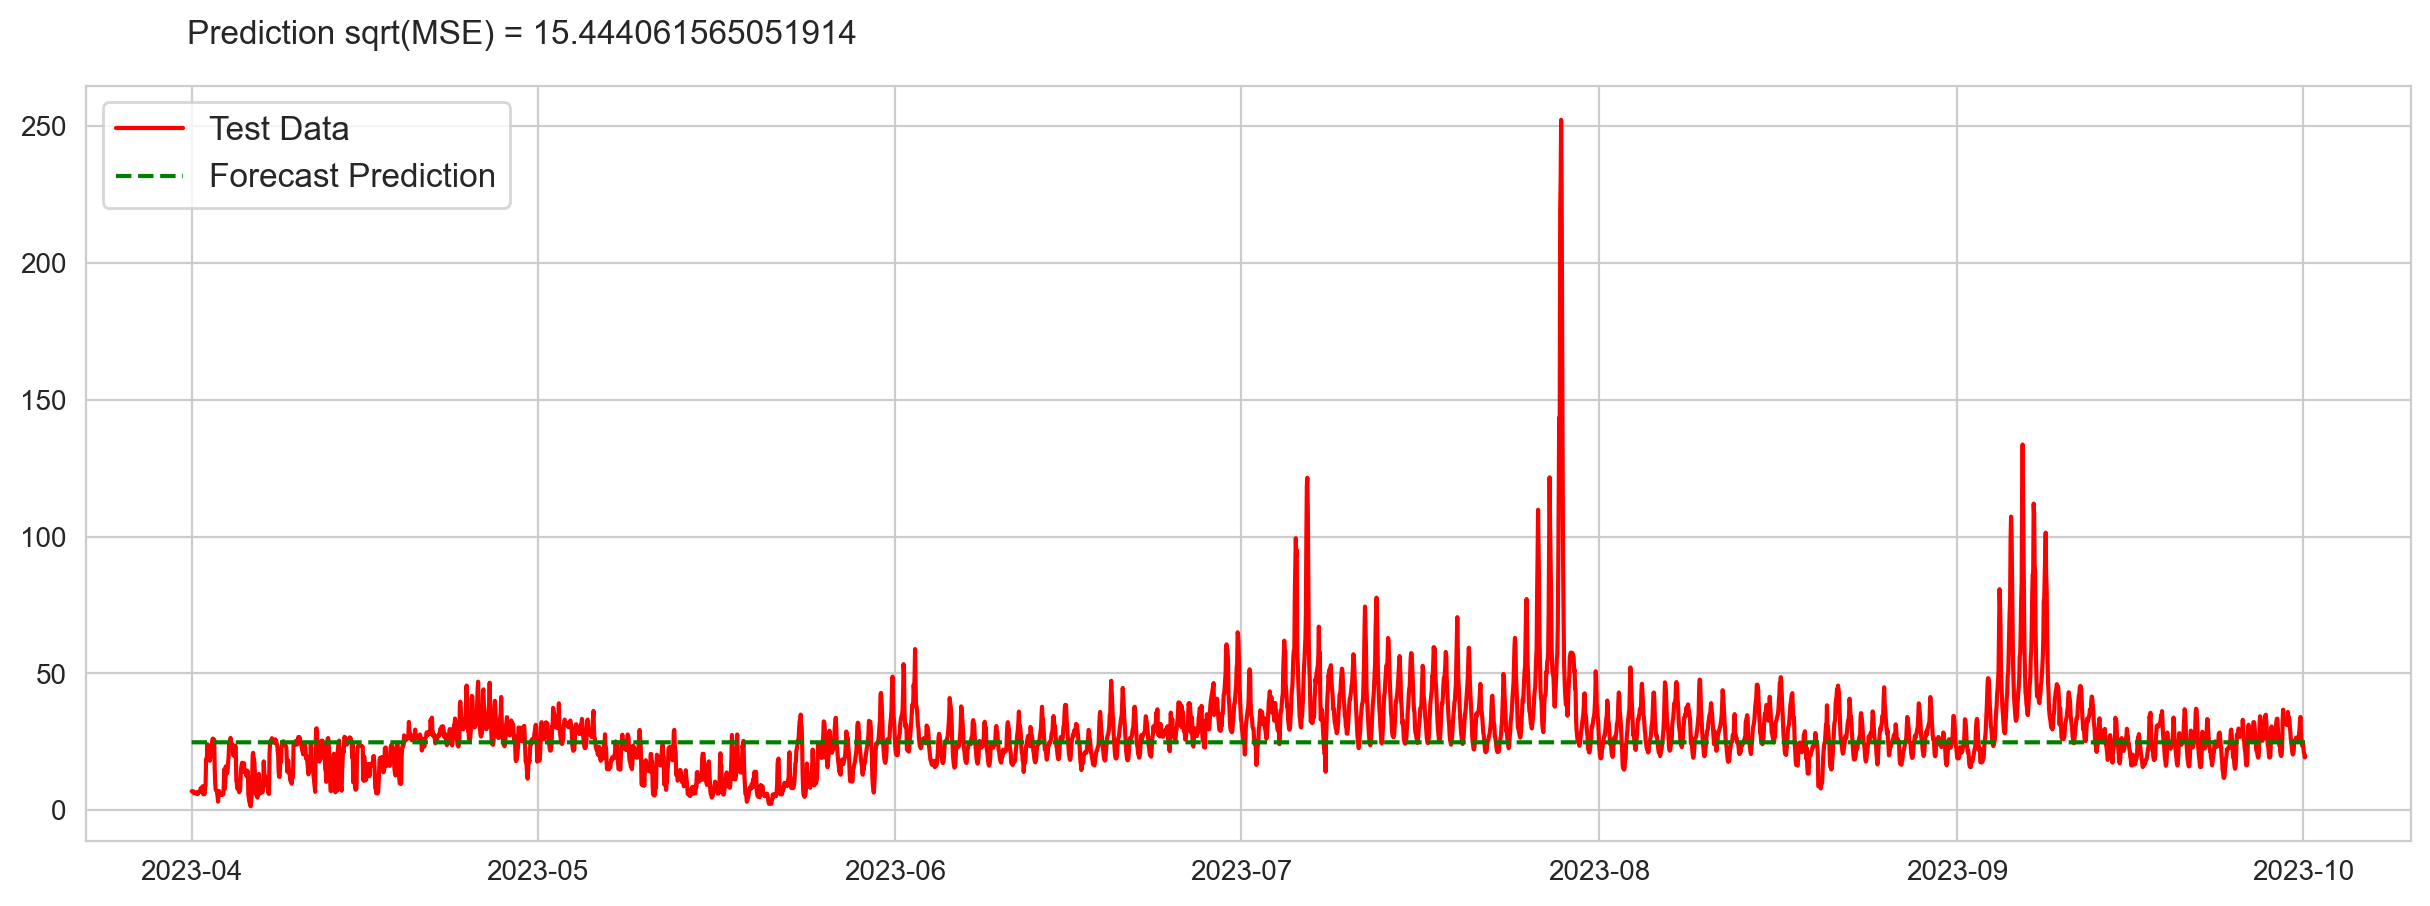

In [100]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(X_test['Time'],
            X_test['Day Ahead Price'],
            'r-',
            label="Test Data")

plt.plot(X_test['Time'],
            preds,
            'g--',
            label="Forecast Prediction")

plt.text(X_train['Time'].values[-10], 280,
         "Prediction sqrt(MSE) = " + str(np.sqrt(mean_squared_error(X_test['Day Ahead Price'],
                                                                  preds))),
         fontsize=12)

plt.legend(fontsize=12, loc=2)

plt.show()

# ARIMA Model (Day Ahead Prices)

In [92]:
from statsmodels.tsa.api import SARIMAX

In [107]:
arima = SARIMAX(endog=X_train['Day Ahead Price'], exog=X_train.drop(['Day Ahead Price','Time'], axis=1),
                   order=(24, 1, 7)).fit(maxiter=200)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40618D+00    |proj g|=  8.57855D-02

At iterate    5    f=  3.38166D+00    |proj g|=  7.47683D-02

At iterate   10    f=  3.37954D+00    |proj g|=  4.27131D-01

At iterate   15    f=  3.37872D+00    |proj g|=  3.98766D-01

At iterate   20    f=  3.37785D+00    |proj g|=  6.78274D-02

At iterate   25    f=  3.37735D+00    |proj g|=  6.42674D-01

At iterate   30    f=  3.37600D+00    |proj g|=  2.96619D-02

At iterate   35    f=  3.37585D+00    |proj g|=  2.54645D-02

At iterate   40    f=  3.37529D+00    |proj g|=  1.03087D-01

At iterate   45    f=  3.37525D+00    |proj g|=  2.24294D-02

At iterate   50    f=  3.37522D+00    |proj g|=  3.10715D-02

At iterate   55    f=  3.37510D+00    |proj g|=  1.42591D-02

At iterate   60    f=  3.37504D+00    |proj g|=  4.69456D-02

At iterate   65    f=  3.3

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  200    f=  3.36648D+00    |proj g|=  2.78114D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   38    200    234      1     0     0   2.781D-02   3.366D+00
  F =   3.3664810668814349     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [ ]:
arima.forecast()

/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_15058/1090241548.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(X_train['Time'][-75:],
/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_15058/1090241548.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train['Day Ahead Price'][-75:],
/var/folders/m4/y5n2bdzx4xs3_tpc_crx0ntc0000gn/T/ipykernel_15058/1090241548.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is dep

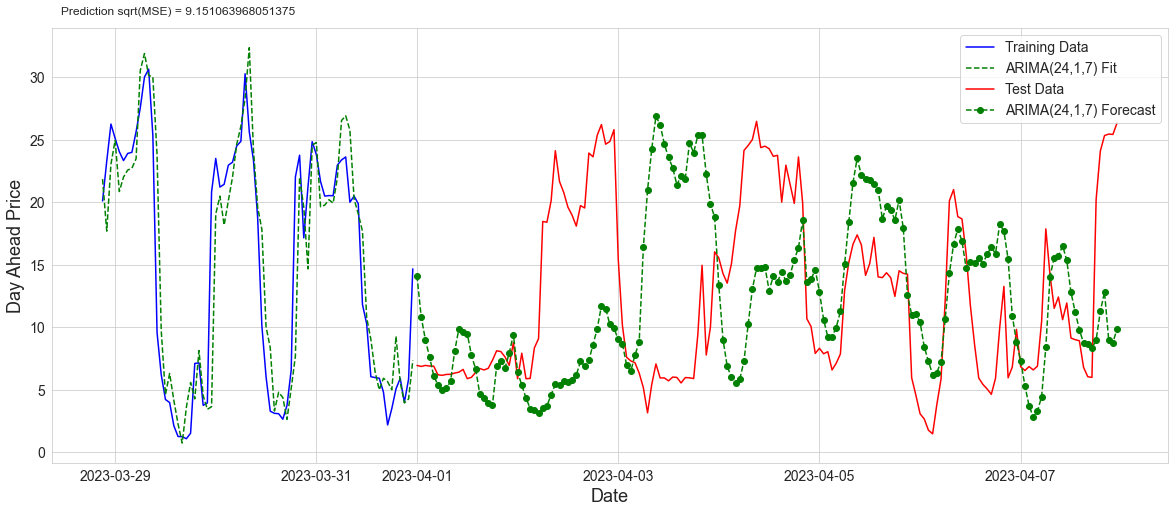

In [134]:
plt.figure(figsize=(20,8))


plt.plot(X_train['Time'][-75:], 
         X_train['Day Ahead Price'][-75:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(X_train['Time'][-75:], 
         arima.fittedvalues[-75:],
         'g--',
         label="ARIMA(24,1,7) Fit")

plt.plot(X_test['Time'][:168], 
         X_test['Day Ahead Price'][:168],
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(X_test['Time'][:168], 
         arima.forecast(168, exog=X_test.drop(['Day Ahead Price','Time'], axis=1)[:168]),
         'g--o',
         label="ARIMA(24,1,7) Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Day Ahead Price", fontsize=18)

plt.text(X_train['Time'].values[-85], 35,
         "Prediction sqrt(MSE) = " + str(np.sqrt(mean_squared_error(X_test['Day Ahead Price'][:168],
                                                                  arima.forecast(168, exog=X_test.drop(['Day Ahead Price','Time'], axis=1)[:168])))),
         fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc='best')

plt.show()